In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')

In [2]:
df_cub_zir = pd.read_csv("C:/Users/piyus/OneDrive/Documents/cubic_zirconia.csv")

**Overview of the Data :**

In [3]:
df_cub_zir.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Size of the Table :**

In [4]:
df_cub_zir.shape

(26967, 11)

**Looking for the missing values:**

In [5]:
df_cub_zir.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

*Hence from above we know that 'depth' has 697 missing values :*

In [6]:
df_cub_zir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df_cub_zir.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


** **

** **

**Exploratory Data Analysis**

** **

*Missing value Correction:*

In [8]:
df_cub_zir['depth'].fillna(df_cub_zir['depth'].mean(), inplace=True)

In [9]:
print(f'before removing duplicates{df_cub_zir.shape}')
df_cub_zir.drop_duplicates(inplace=True)
print(f'after removing duplicates{df_cub_zir.shape}')

before removing duplicates(26967, 11)
after removing duplicates(26967, 11)


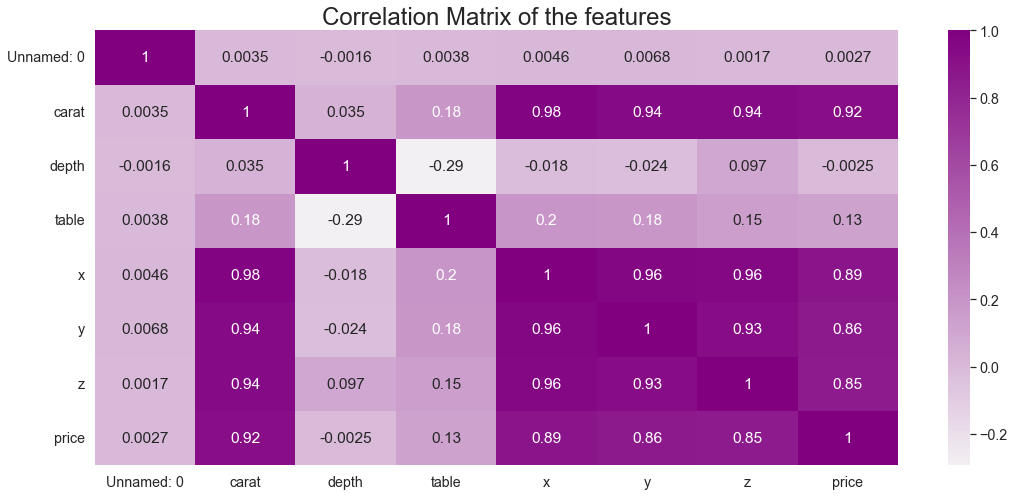

In [10]:
corr_matrix = df_cub_zir.corr()

plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
cmap = sns.light_palette("purple",as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,annot=True)
plt.title("Correlation Matrix of the features",fontsize=24)
#plt.savefig('plot16.png', dpi=300, bbox_inches='tight')
plt.show()

**Univariate Analysis :**

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


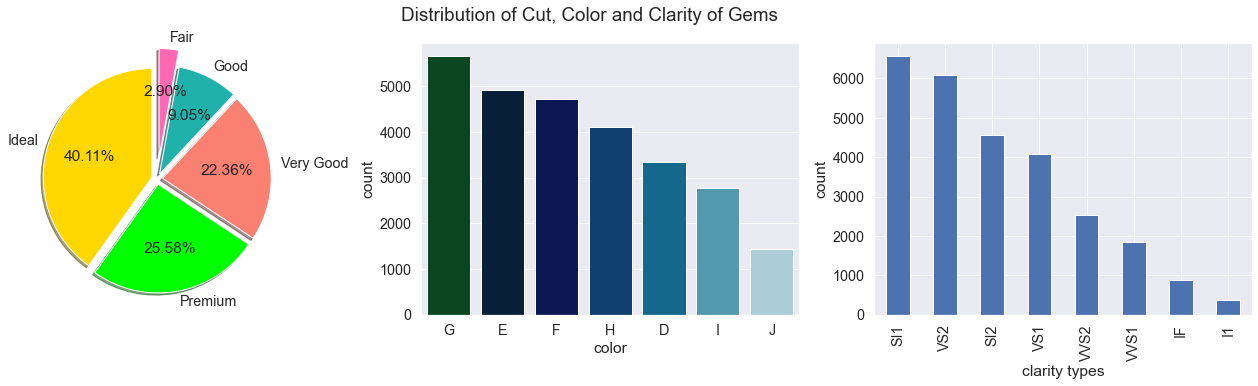

In [11]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df_cub_zir['cut'].value_counts().values,
        labels=df_cub_zir['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lime', 'salmon', 'lightseagreen', 'hotpink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df_cub_zir['color'], palette='ocean', order=df_cub_zir['color'].value_counts().index)

plt.subplot(133)
df_cub_zir["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')
plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

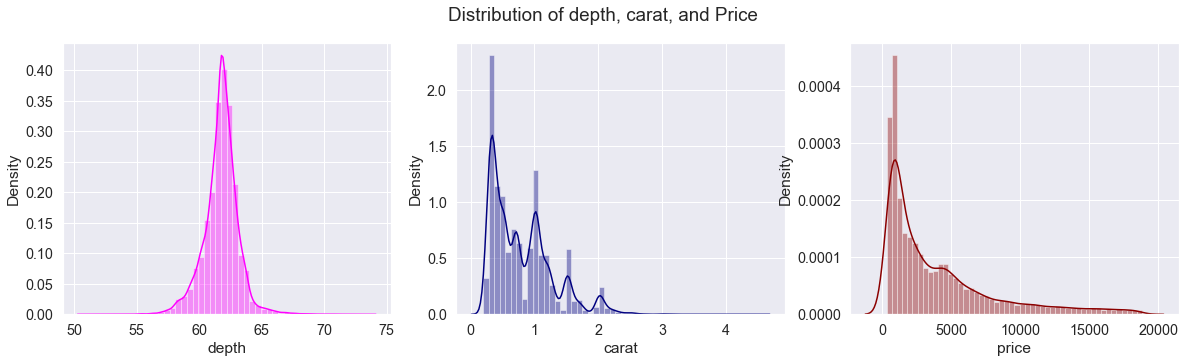

In [12]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df_cub_zir['depth'], color='magenta')

plt.subplot(132)
sns.distplot(df_cub_zir['carat'], color='navy')

plt.subplot(133)
sns.distplot(df_cub_zir['price'], color='darkred')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

*From above we can see that :*

*1.) the depth of diamonds lie between 55 -65*

*2.) Most of the diamonds are of 0.5 - 2 carat*

*3.) Prices of the most ofthe diamonds lie between a few hundreds to 5000*

** **

** **

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


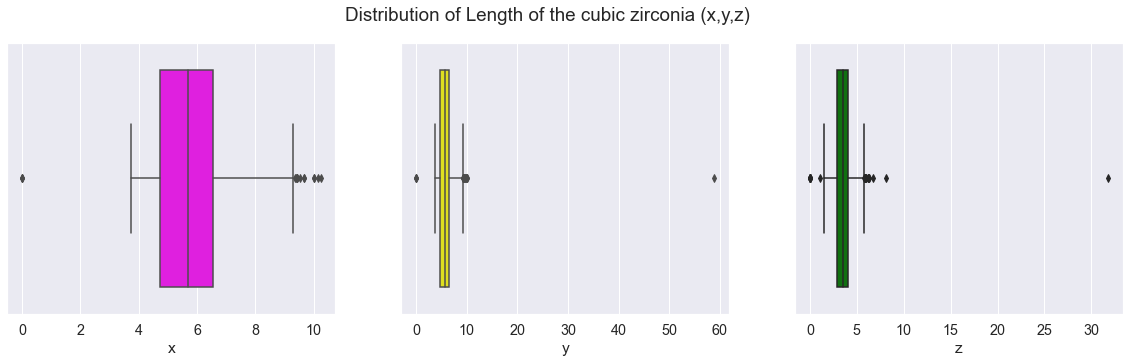

In [13]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df_cub_zir['x'], color='magenta')

plt.subplot(132)
sns.boxplot(df_cub_zir['y'], color='yellow')

plt.subplot(133)
sns.boxplot(df_cub_zir['z'], color='green')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

**Bivariate Analysis:**

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


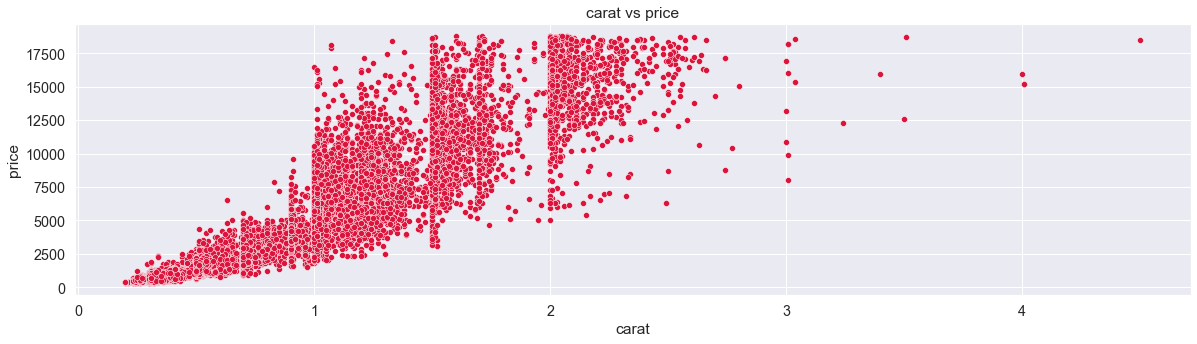

In [14]:
sns.scatterplot(df_cub_zir['carat'], df_cub_zir['price'],color='crimson')
plt.title('carat vs price')
plt.show()

*Point of Analysis -1:*


*In the above scatterplot , we see that most of the diamonds are from 1-2 carat and their price vary from 2500 to 17500 ;
The least number of diamonds are the 4-carat ones and their price starts from 15000*

 **Multivariate Analysis**

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


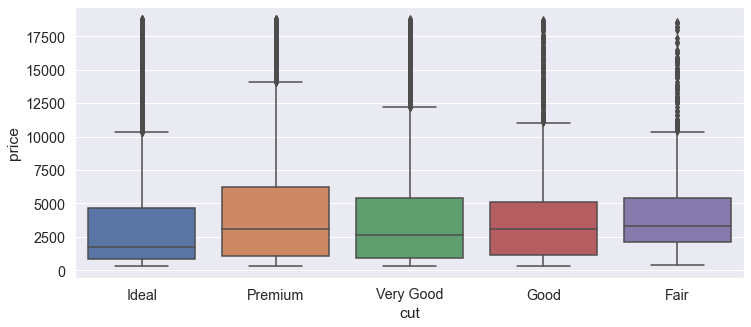

In [15]:
plt.figure(figsize = (12,5))
sns.boxplot(df_cub_zir['cut'], df_cub_zir['price'])
plt.show()


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


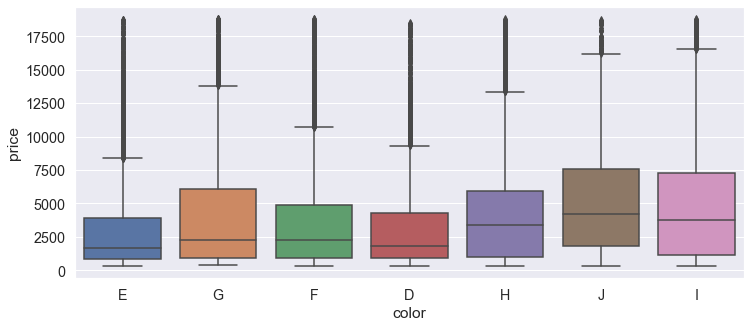

In [16]:
plt.figure(figsize = (12,5))
sns.boxplot(df_cub_zir['color'], df_cub_zir['price'])
plt.show()

In [18]:
df_cub_zir[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='BuPu')

*Point of Analysis - 2 :*

*A Fair-cut diamond has a minimum cost of 369 , whereas an Ideal-cut diamond has a minimum price of 326 .
Overall the Fair-cut diamonds are the costliest*

* **

In [20]:
df_cub_zir[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='YlGnBu')

*Point of analysis-3 :*

*The diamonds with IF clarity have the highest minimum price for any diamond across all kind of clarity categories , whereas SI2 diamonds have the highest mean price or average price and lastly the highest price for any diamond is that of the SI1 clarity.*

In [21]:
df_cub_zir[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Greens')